# Intorduction to Convolutional Neural Networks and Computer Vision with Tensorflow

Computer vision is the practice of writing algorithms which can discover patterns in visual data.

## Get the data

The images we are working with are from Food101 dataset. 

However, we've modified it to only use two classes (pizza and steak) using the image data modification notebook. 

> **Note**: We start with a smaleer dataset so that we can experiment quickly.

import zipfile

! wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

# Inspect the data

A very crucial step at the beginning of any machine learning project is becoming one with the publish_display_data

In Computer vision, it generally means visualising your data.

In [1]:
!ls pizza_steak

test  train


In [2]:
! ls pizza_steak/train

pizza steak


In [3]:
! ls pizza_steak/train/pizza

1008104.jpg 1638227.jpg 2235981.jpg 2774899.jpg 3464027.jpg 576236.jpg
1008144.jpg 1646974.jpg 2236914.jpg 2775763.jpg 3464858.jpg 5764.jpg
1008844.jpg 1649108.jpg 2241448.jpg 2778214.jpg 3473991.jpg 579691.jpg
1008941.jpg 1649276.jpg 2247711.jpg 277963.jpg  3475936.jpg 593400.jpg
1011404.jpg 1652943.jpg 2253670.jpg 2785084.jpg 3478964.jpg 59445.jpg
102037.jpg  1654444.jpg 2255361.jpg 2793535.jpg 3479875.jpg 596494.jpg
1026922.jpg 1660415.jpg 2274117.jpg 27963.jpg   3479936.jpg 598381.jpg
1029698.jpg 1663749.jpg 2279642.jpg 2800325.jpg 3484590.jpg 604977.jpg
1033251.jpg 1665654.jpg 2280345.jpg 2811032.jpg 3493457.jpg 608085.jpg
1035854.jpg 166823.jpg  2285269.jpg 282013.jpg  349946.jpg  618021.jpg
1038357.jpg 1670471.jpg 2285942.jpg 2821034.jpg 350358.jpg  61822.jpg
1040878.jpg 1671531.jpg 228778.jpg  2821048.jpg 3505182.jpg 618348.jpg
1044524.jpg 1678284.jpg 2291093.jpg 2827938.jpg 3512070.jpg 625687.jpg
1044789.jpg 1681043.jpg 2292986.jpg 2831983.jpg 3514408.jpg 626170.jpg
1047561.jp

In [4]:
import os

# Walkthrough pizza_steak directory and list number of files

for dirpath, dirnames, filenames in os.walk("pizza_steak"):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}")

There are 2 directories and 0 images in pizza_steak
There are 2 directories and 0 images in pizza_steak/test
There are 0 directories and 250 images in pizza_steak/test/steak
There are 0 directories and 250 images in pizza_steak/test/pizza
There are 2 directories and 0 images in pizza_steak/train
There are 0 directories and 750 images in pizza_steak/train/steak
There are 0 directories and 750 images in pizza_steak/train/pizza


In [5]:
# Another wat to find out how many images are imn file
num_steak_images_train = len(os.listdir("pizza_steak/train/pizza"))

num_steak_images_train

750

To viuslaise our images, first let's get the class names programmatically

In [6]:
# Get hte class names programmatically
import pathlib
import numpy as np

data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) # Create a list of class_names from the sub directories

print(class_names)

['pizza' 'steak']


In [7]:
# Let's Visualize our images

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(trg_dir, trg_class):
    # Setup the target directory
    trg_folder = trg_dir + trg_class

    # Get a random image
    random_img = random.sample(os.listdir(trg_folder), 1)

    # Read the image and plot it using matplotlib 
    img = mpimg.imread(trg_folder + "/" + random_img[0])

    plt.imshow(img)
    plt.title(trg_class)
    plt.axis("off")

    print(f"image shape: {img.shape}")

    return img

image shape: (512, 512, 3)


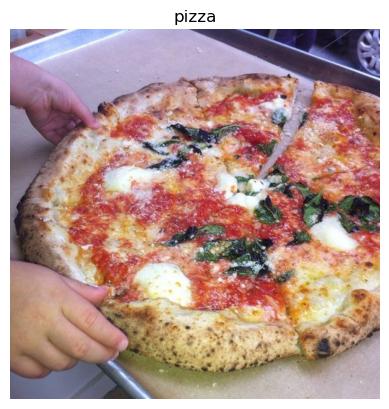

In [8]:
# View a random image from the training dataset
img = view_random_image(trg_dir= "pizza_steak/train/",
                  trg_class= "pizza")

In [9]:
import tensorflow as tf

tf.constant(img)

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[137, 147, 198],
        [135, 145, 196],
        [134, 144, 197],
        ...,
        [112, 114, 175],
        [104, 109, 164],
        [106, 112, 162]],

       [[133, 140, 192],
        [130, 137, 189],
        [130, 137, 189],
        ...,
        [119, 120, 184],
        [102, 107, 163],
        [ 90,  96, 146]],

       [[131, 137, 185],
        [128, 134, 182],
        [128, 134, 184],
        ...,
        [131, 132, 196],
        [103, 108, 164],
        [ 71,  77, 129]],

       ...,

       [[ 96,  92, 117],
        [ 97,  93, 118],
        [ 97,  93, 118],
        ...,
        [198, 182, 193],
        [197, 181, 192],
        [198, 182, 193]],

       [[ 95,  91, 116],
        [ 96,  92, 117],
        [ 98,  94, 119],
        ...,
        [197, 181, 192],
        [198, 182, 193],
        [200, 184, 195]],

       [[ 97,  93, 118],
        [ 98,  94, 119],
        [ 99,  95, 120],
        ...,
        [199, 183, 19

In [10]:
img.shape # returns width, height, color channels

(512, 512, 3)

**Note**: Many machine learning model prefer to work between 0 and 1 values

In [11]:
# Get all the pixel values between 0 and 1
img/255.

array([[[0.5372549 , 0.57647059, 0.77647059],
        [0.52941176, 0.56862745, 0.76862745],
        [0.5254902 , 0.56470588, 0.77254902],
        ...,
        [0.43921569, 0.44705882, 0.68627451],
        [0.40784314, 0.42745098, 0.64313725],
        [0.41568627, 0.43921569, 0.63529412]],

       [[0.52156863, 0.54901961, 0.75294118],
        [0.50980392, 0.5372549 , 0.74117647],
        [0.50980392, 0.5372549 , 0.74117647],
        ...,
        [0.46666667, 0.47058824, 0.72156863],
        [0.4       , 0.41960784, 0.63921569],
        [0.35294118, 0.37647059, 0.57254902]],

       [[0.51372549, 0.5372549 , 0.7254902 ],
        [0.50196078, 0.5254902 , 0.71372549],
        [0.50196078, 0.5254902 , 0.72156863],
        ...,
        [0.51372549, 0.51764706, 0.76862745],
        [0.40392157, 0.42352941, 0.64313725],
        [0.27843137, 0.30196078, 0.50588235]],

       ...,

       [[0.37647059, 0.36078431, 0.45882353],
        [0.38039216, 0.36470588, 0.4627451 ],
        [0.38039216, 0

## An end-to-example

Let's build a CNN to find patterns in our images.

* Load our images
* Preprocess our images
* Build a CNN
* Compile CNN
* Fit the CNN

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)

# Preprocessing data
train_datagen = ImageDataGenerator(rescale= 1/255.)
valid_datagen = ImageDataGenerator(rescale= 1/255.)

# Setup path to directories
train_dir = '/Users/klsharma22/Desktop/TensorflowCertifcationCourse/pizza_steak/train'
test_dir = '/Users/klsharma22/Desktop/TensorflowCertifcationCourse/pizza_steak/test'

# IMport data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory= train_dir,
                                              batch_size= 32,
                                              target_size= (224, 224),
                                              class_mode= "binary",
                                              seed= 42)
valid_data = valid_datagen.flow_from_directory(directory= test_dir,
                                              batch_size= 32,
                                              target_size= (224, 224),
                                              class_mode= "binary",
                                               seed= 42)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [13]:
# Build a CNN model
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters= 10,
                           kernel_size= 3,
                           activation= 'relu',
                           input_shape= (224, 224, 3)),
    tf.keras.layers.Conv2D(10, 3, activation= 'relu'),
    tf.keras.layers.MaxPool2D(pool_size= 2, padding= 'valid'),
    tf.keras.layers.Conv2D(10, 3, activation= 'relu'),
    tf.keras.layers.Conv2D(10, 3, activation= 'relu'),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation= 'sigmoid')
])

model_1.compile(loss= tf.keras.losses.BinaryCrossentropy(),
                optimizer= tf.keras.optimizers.Adam(),
                metrics= ['accuracy'])

history_1 = model_1.fit(train_data,
                        epochs= 5,
                        steps_per_epoch= len(train_data),
                        validation_data= valid_data,
                        validation_steps= len(valid_data))

Epoch 1/5


2024-02-07 12:28:18.421253: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


47/47 [==============================] - 13s 262ms/step - loss: 0.6176 - accuracy: 0.6313 - val_loss: 0.4917 - val_accuracy: 0.7400
Epoch 2/5
47/47 [==============================] - 13s 268ms/step - loss: 0.4244 - accuracy: 0.8067 - val_loss: 0.3365 - val_accuracy: 0.8420
Epoch 3/5
47/47 [==============================] - 12s 259ms/step - loss: 0.3761 - accuracy: 0.8387 - val_loss: 0.3229 - val_accuracy: 0.8600
Epoch 4/5
47/47 [==============================] - 12s 259ms/step - loss: 0.3292 - accuracy: 0.8693 - val_loss: 0.2900 - val_accuracy: 0.8860
Epoch 5/5
47/47 [==============================] - 12s 258ms/step - loss: 0.2596 - accuracy: 0.9093 - val_loss: 0.3797 - val_accuracy: 0.8320


> **Note**: If the above cell is taking longer than 10s per epoch, make sure you're using a GPU

In [14]:
# Get Model summary
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

**Resources**: CNN Explainer website for CNN working

## Use the same model as before

Let's see model in our previous section works in image data

In [15]:
# Set random seed
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape= (224, 224, 3)),
    tf.keras.layers.Dense(4, activation= 'relu'),
    tf.keras.layers.Dense(4, activation= 'relu'),
    tf.keras.layers.Dense(1, activation= 'sigmoid')
])

model_2.compile(loss= tf.keras.losses.binary_crossentropy,
                optimizer= tf.keras.optimizers.Adam(),
                metrics= ['accuracy'])

history_2 = model_2.fit(train_data,
                        epochs= 5,
                        steps_per_epoch= len(train_data),
                        validation_data= valid_data,
                        validation_steps= len(valid_data))

Epoch 1/5
47/47 [==============================] - 4s 83ms/step - loss: 1.4193 - accuracy: 0.4913 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 4s 79ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 4s 79ms/step - loss: 0.6932 - accuracy: 0.4880 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 4s 78ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 4s 78ms/step - loss: 0.6932 - accuracy: 0.4867 - val_loss: 0.6931 - val_accuracy: 0.5000


In [16]:
# Get a summary
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 602116    
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


Despiter having 20x more parameters than our  CNN model, model_2 performs terribly

In [17]:
# Set random seed
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape= (224, 224, 3)),
    tf.keras.layers.Dense(100, activation= 'relu'),
    tf.keras.layers.Dense(100, activation= 'relu'),
    tf.keras.layers.Dense(100, activation= 'relu'),
    tf.keras.layers.Dense(1, activation= 'sigmoid')
])

model_3.compile(loss= tf.keras.losses.binary_crossentropy,
                optimizer= tf.keras.optimizers.Adam(),
                metrics= ['accuracy'])

history_3 = model_3.fit(train_data,
                        epochs= 5,
                        steps_per_epoch= len(train_data),
                        validation_data= valid_data,
                        validation_steps= len(valid_data))

Epoch 1/5
47/47 [==============================] - 4s 87ms/step - loss: 4.6480 - accuracy: 0.6113 - val_loss: 1.1894 - val_accuracy: 0.6300
Epoch 2/5
47/47 [==============================] - 4s 85ms/step - loss: 1.1134 - accuracy: 0.6973 - val_loss: 0.4538 - val_accuracy: 0.8000
Epoch 3/5
47/47 [==============================] - 4s 86ms/step - loss: 0.7003 - accuracy: 0.7247 - val_loss: 0.9304 - val_accuracy: 0.6660
Epoch 4/5
47/47 [==============================] - 4s 85ms/step - loss: 0.6647 - accuracy: 0.7600 - val_loss: 1.2060 - val_accuracy: 0.6260
Epoch 5/5
47/47 [==============================] - 4s 85ms/step - loss: 0.7139 - accuracy: 0.7447 - val_loss: 0.7284 - val_accuracy: 0.7400


In [18]:
# Get a summary
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_4 (Dense)             (None, 100)               15052900  
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


## Binary Classification: Let's Break it Down

1. Understadn the data by visualising
2. Preprocess the data
3. Create a model starting with a baseline
4. Fit the model
5. Evaluate the model
6. Improvie the model
7. Repeat until satisified

### 1. Understand the data

image shape: (512, 384, 3)
image shape: (384, 512, 3)


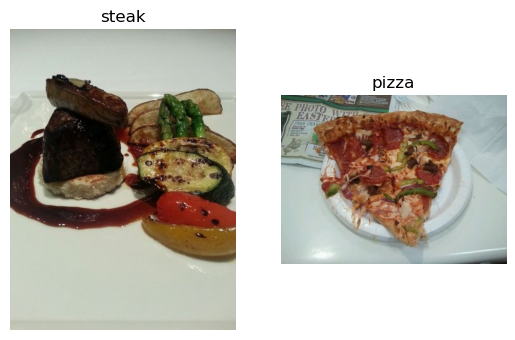

In [19]:
# Visualize data

plt.figure()
plt.subplot(1, 2, 1)
steak_img = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1, 2, 2)
pizza_img = view_random_image("pizza_steak/train/", "pizza")

### 2. Preprocess the data

In [20]:
# Defien directory dataset paths
train_dir, test_dir

('/Users/klsharma22/Desktop/TensorflowCertifcationCourse/pizza_steak/train',
 '/Users/klsharma22/Desktop/TensorflowCertifcationCourse/pizza_steak/test')

Our next step is to turn our data into **batches**

A batch is a small subset of data.

In [21]:
# Create train and test data generator and rescale the data
train_datagen, valid_datagen

(<keras.preprocessing.image.ImageDataGenerator at 0x10fe8a020>,
 <keras.preprocessing.image.ImageDataGenerator at 0x10fe89780>)

In [22]:
# Loasd the images from directoriers and turn them into batches
train_datagen.flow_from_directory

# Parameters of flow_from_directory
# Target image path
# target image size
# type of data you're working
# size of minibatches

<bound method ImageDataGenerator.flow_from_directory of <keras.preprocessing.image.ImageDataGenerator object at 0x10fe8a020>>

In [23]:
# Get sample of train data batch
images, labels = train_data.next()
len(images), len(labels)

(32, 32)

In [24]:
# How many batches are there
len(train_data)

47

In [25]:
1500/32

46.875

In [26]:
# Get the first two images
images[:2], images[0].shape

(array([[[[0.28235295, 0.2392157 , 0.30588236],
          [0.27058825, 0.227451  , 0.29411766],
          [0.27058825, 0.227451  , 0.29411766],
          ...,
          [0.08235294, 0.07058824, 0.1137255 ],
          [0.07450981, 0.0627451 , 0.09803922],
          [0.0627451 , 0.03921569, 0.07843138]],
 
         [[0.30588236, 0.2627451 , 0.32941177],
          [0.28627452, 0.24313727, 0.30980393],
          [0.28235295, 0.2392157 , 0.3019608 ],
          ...,
          [0.07058824, 0.0627451 , 0.10588236],
          [0.08235294, 0.07058824, 0.10588236],
          [0.05490196, 0.04313726, 0.07843138]],
 
         [[0.3254902 , 0.28235295, 0.34509805],
          [0.30588236, 0.2627451 , 0.3254902 ],
          [0.3019608 , 0.25882354, 0.32156864],
          ...,
          [0.07058824, 0.07058824, 0.10196079],
          [0.07450981, 0.07058824, 0.10196079],
          [0.05882353, 0.05490196, 0.08627451]],
 
         ...,
 
         [[0.98823535, 1.        , 0.9725491 ],
          [0.98823

In [27]:
# View the first batch of labels
labels

array([1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0.],
      dtype=float32)

### 3. Create CNN model

A baseline is relatively simple model or existing result that you setup when beginning a machine learning experiment and then as you keep experimenting, you try to beat the baseline.

In [28]:
# The above which was created

model_4 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters= 10, # number of sliding windows 
                           kernel_size= (3, 3), #size of the window
                           strides= (1, 1), # size of the steps
                           padding= 'valid',
                           activation= 'relu',
                           input_shape= (224, 224, 3)),
                           tf.keras.layers.Conv2D(10, 3, activation= 'relu'),
                           tf.keras.layers.Conv2D(10, 3, activation= 'relu'),
                           tf.keras.layers.Flatten(),
                           tf.keras.layers.Dense(1, activation= 'sigmoid')
])

 **Practice**: Understand waht's going on in a Conv2d

In [29]:
# Compile the model
model_4.compile(loss= "binary_crossentropy",
                optimizer= tf.keras.optimizers.Adam(),
                metrics= ['accuracy'])

In [30]:
#Get a summary
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_3 (Flatten)         (None, 475240)            0         
                                                                 
 dense_8 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


### 4. Fit the model

In [31]:
# Check the lengths of training and test data
len(train_data), len(valid_data)

(47, 16)

In [32]:
history_4 = model_4.fit(train_data,
                        epochs= 5,
                        steps_per_epoch= len(train_data),
                        validation_data= valid_data,
                        validation_steps= len(valid_data))

Epoch 1/5


47/47 [==============================] - 15s 322ms/step - loss: 0.8435 - accuracy: 0.6040 - val_loss: 0.5298 - val_accuracy: 0.7500
Epoch 2/5
47/47 [==============================] - 15s 320ms/step - loss: 0.4533 - accuracy: 0.8093 - val_loss: 0.4287 - val_accuracy: 0.8380
Epoch 3/5
47/47 [==============================] - 15s 319ms/step - loss: 0.3285 - accuracy: 0.8793 - val_loss: 0.3770 - val_accuracy: 0.8480
Epoch 4/5
47/47 [==============================] - 15s 321ms/step - loss: 0.1475 - accuracy: 0.9533 - val_loss: 0.3876 - val_accuracy: 0.8100
Epoch 5/5
47/47 [==============================] - 15s 325ms/step - loss: 0.0528 - accuracy: 0.9893 - val_loss: 0.5359 - val_accuracy: 0.7980


### 5. Evaluating our model

It looks like our model is learning, let's evaluate it

<Axes: >

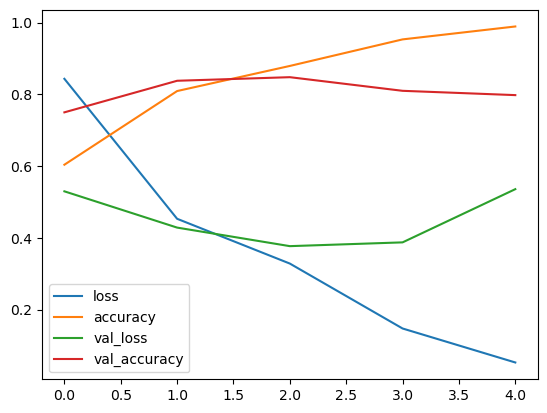

In [33]:
import pandas as pd

pd.DataFrame(history_4.history).plot()

In [34]:
def plot_loss_curves(history):
    '''
    Returns separate loss curves for training and validation metrics
    '''

    loss = history.history['loss']
    val_loss = history.history['val_loss']

    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']

    epochs = range(len(history.history['loss']))

    plt.figure()
    plt.plot(epochs, loss, label= 'Training Loss')
    plt.plot(epochs, val_loss, label= "Testing Loss")
    plt.title("Loss Curve")
    plt.xlabel("Epochs")
    plt.legend()

    plt.figure()
    plt.plot(epochs, accuracy, label= "Training accuracy")
    plt.plot(epochs, val_accuracy, label= "Testing accuracy")
    plt.title("Accuracy Curve")
    plt.xlabel("Epochs")
    plt.legend()


**Note**: When a model's validation loss starts to increase, it's likely that the model is **overfittiing** the training dataset. This means it is memorising the training data instead of genralising.

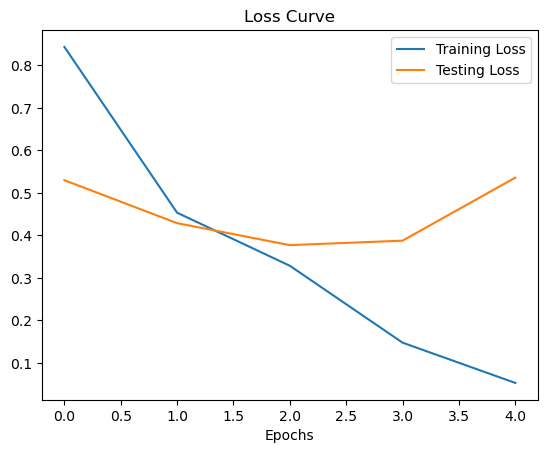

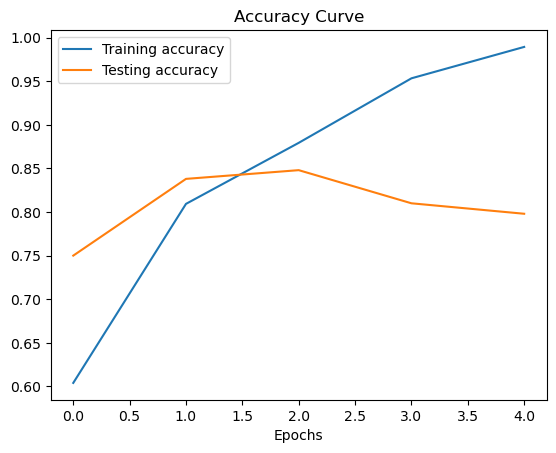

In [35]:
# Check the loss and accuracy curve
plot_loss_curves(history_4)

### 6. Adjust the model parameters

Fitting a machine learning model comes in 3 steps:

1. Create a baseline
2. Beat the baseline by overfitting a larger model. 
3. Reduce the overfitting

Ways to induce overfitting:
* Increase the number of conv layers
* INcrease the number of conv filters
* Add another dense layer to the output of out flattened layer

Reduce overfitting:
* Add data augmentation
* Add regularization layers
* Add more data

In [36]:
# Create the model

model_5 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(10, 3, activation= 'relu'),
    tf.keras.layers.MaxPool2D(pool_size= 2),
    tf.keras.layers.Conv2D(10, 3, activation= 'relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(10, 3, activation= 'relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation= 'sigmoid')
])

model_5.compile(loss= tf.keras.losses.BinaryCrossentropy(),
                optimizer= tf.keras.optimizers.Adam(),
                metrics= ['accuracy'])

history_5 = model_5.fit(train_data,
                        epochs= 5,
                        steps_per_epoch= len(train_data),
                        validation_data= valid_data,
                        validation_steps= len(valid_data))

Epoch 1/5
47/47 [==============================] - 7s 139ms/step - loss: 0.6128 - accuracy: 0.6447 - val_loss: 0.4527 - val_accuracy: 0.8040
Epoch 2/5
47/47 [==============================] - 6s 137ms/step - loss: 0.4485 - accuracy: 0.7920 - val_loss: 0.4112 - val_accuracy: 0.8300
Epoch 3/5
47/47 [==============================] - 7s 142ms/step - loss: 0.4264 - accuracy: 0.8133 - val_loss: 0.3570 - val_accuracy: 0.8360
Epoch 4/5
47/47 [==============================] - 7s 142ms/step - loss: 0.3868 - accuracy: 0.8393 - val_loss: 0.4032 - val_accuracy: 0.7940
Epoch 5/5
47/47 [==============================] - 7s 140ms/step - loss: 0.3727 - accuracy: 0.8513 - val_loss: 0.3858 - val_accuracy: 0.8300


In [37]:
# Get a summary
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, None, None, 10)    280       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, None, None, 10)   0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, None, None, 10)    910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, None, None, 10)   0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, None, None, 10)    910       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, None, None, 10)  

In [38]:
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_3 (Flatten)         (None, 475240)            0         
                                                                 
 dense_8 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


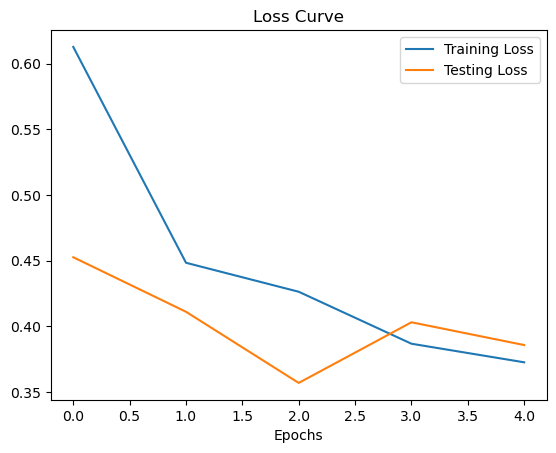

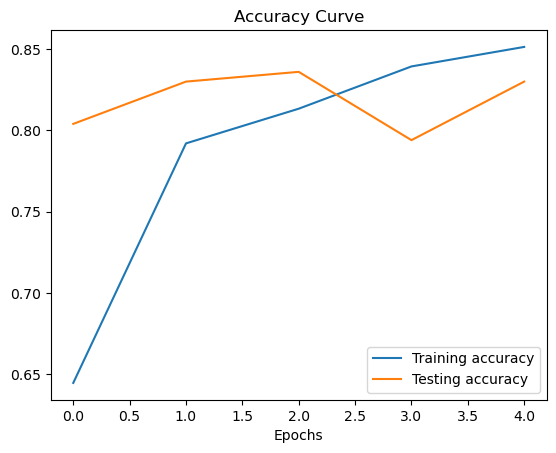

In [39]:
plot_loss_curves(history_5)

**Note**: Ideally the two loss curves will be very similar to each other. However, if there are large difference, your model is overfitting.

### Opening our bag of tricks and finding data augmentation

In [44]:
# Create ImageDataGenerator training instance with data augmentation

train_datagen_augmented = ImageDataGenerator(rescale= 1/255.,
                                             rotation_range= 0.2, # How much rotation is required
                                             shear_range= 0.2, # 
                                             zoom_range= 0.2,
                                             width_shift_range= 0.2,
                                             height_shift_range= 0.3,
                                             horizontal_flip = True)

# Create ImageGenerator without data augmentation
train_datagen = ImageDataGenerator(rescale= 1/255.)
test_datagen = ImageDataGenerator(rescale= 1/255.)

> **Question**: What is data augmentation?

Data augmentation is the process of altering our training data, leading it to have more diversity and in turn  allowing our models to learn more generalisable patterns. Altering might mean adjusting the rotation of an image, flipping it, cropping it or something similar.

Let's visulaise

In [45]:
# Import data and augment it from training directory
print("Augmented data: ")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size = (224, 224),
                                                                   batch_size= 32,
                                                                   class_mode= 'binary',
                                                                   shuffle= False)

# Create non augmented data batches
print("Non Augmented data: ")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size= (224, 224),
                                               batch_size= 32,
                                               class_mode= 'binary',
                                               shuffle= False)

# Create non augmented test data
print("Non augmented test data: ")
test_data = test_datagen.flow_from_directory(test_dir,
                                              target_size= (224, 224),
                                              batch_size= 32,
                                              class_mode= 'binary',
                                              shuffle= False)

Augmented data: 
Found 1500 images belonging to 2 classes.


Non Augmented data: 
Found 1500 images belonging to 2 classes.
Non augmented test data: 
Found 500 images belonging to 2 classes.


> **Note**: Data augmentation is usuallu only performed on the training data. Using `ImageDataGenerator` built-in data augmentation parameters our images are left as they are in the directories but are modified as they're loaded into the model

Let's visualise augmented data

In [42]:
# Get sample data batches

iamges, label = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next()

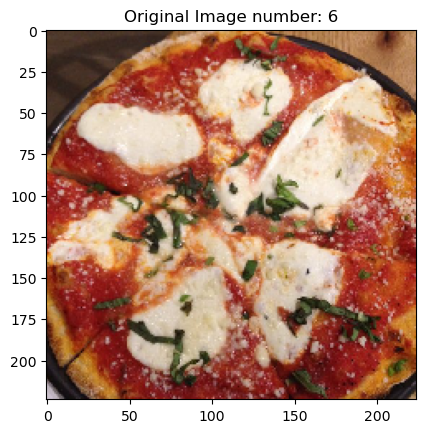

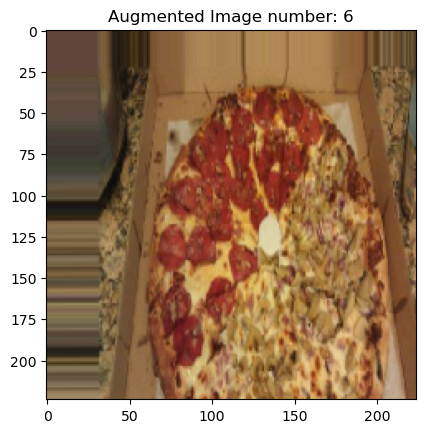

In [46]:
# Show the original image and the augmented image
rand_number = random.randint(0, 32)
plt.figure()
plt.title(f"Original Image number: {rand_number}")
plt.imshow(images[rand_number])

plt.figure()
plt.title(f"Augmented Image number: {rand_number}")
plt.imshow(augmented_images[rand_number])